Вариант 10

Искажения: Обрезка с заменой данными из исходного контейнера, повышение резкости, медианная фильтрация, jpeg-сжатие с потерями

Исследуемая система СВИ-16 

In [1]:
import cv2
import numpy as np
from PIL import Image
from math import floor, sqrt
import matplotlib.pyplot as plt 
import os
import subprocess 
from scipy.ndimage import convolve

In [2]:
def crop_part_Cw(theta, Cw, C):
    N1 = Cw.shape[0]
    N2 = Cw.shape[1]
    n1 = floor(N1 * sqrt(theta))
    n2 = floor(N2 * sqrt(theta))

    tmp_Cw = np.zeros((n1, n2))
    tmp_Cw = Cw[0:n1+1, 0:n2+1]

    result = C.copy()
    result[0:n1+1, 0:n2+1] = tmp_Cw
    return result

In [3]:
def medianFilt_img(Cw, win_size):
    return cv2.medianBlur(Cw, win_size)

In [4]:
def sharpening(Cw, M):
    tmpCw = Cw.copy()
    kernel = (1/(M ** 2))*np.ones((M, M))
    return tmpCw + 5*(tmpCw - convolve(tmpCw, kernel, mode='nearest')) # cv2.filter2D(Cw, -1, kernel))

In [5]:
def jpeg_img(Cw, qual):
    cv2.imwrite('C:\\Users\\Admin\\Desktop\\Lab3\\Cw{}.jpg'.format(qual), Cw, [int(cv2.IMWRITE_JPEG_QUALITY), qual])
    return cv2.cvtColor(cv2.imread('C:\\Users\\Admin\\Desktop\\Lab3\\Cw{}.jpg'.format(qual)),  cv2.COLOR_BGR2GRAY)

In [6]:
def gen_wm():
    os.system('gen_corvi_sig -o corvi.sig')
    os.system('wm_corvi_e -s corvi.sig -o corvi_peppers.pgm peppers.pgm')

In [7]:
def quality(list_img, list_key, num_task):
    q = []
    for j in range(len(list_img)):
        name = 'Cw_' + str(num_task) + '_' + str(list_key[j]) + '.pgm'
        os.system('wm_corvi_d -s corvi.sig -i peppers.pgm -o corvi.wm {}'.format(name))
        batcmd="cmp_corvi_sig -C -s corvi.sig corvi.wm" 
        result = []
        result = (list(subprocess.check_output(batcmd, shell=True).decode('utf-8'))[:len(result)-2])
        result = float(''.join(result))
        q.append((result))
    return q

In [8]:
gen_wm()

In [9]:
C = cv2.cvtColor(cv2.imread('C:\\Users\\Admin\\Desktop\\Lab3\\peppers.pgm'), cv2.COLOR_BGR2GRAY)
Cw = cv2.cvtColor(cv2.imread('C:\\Users\\Admin\\Desktop\\Lab3\\corvi_peppers.pgm'), cv2.COLOR_BGR2GRAY)

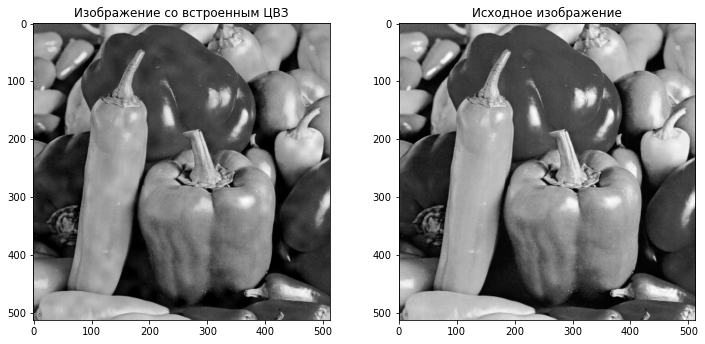

In [10]:
plt.figure(figsize = (12, 12))
plt.subplot(2,2,1)
plt.title('Изображение со встроенным ЦВЗ')
plt.imshow(Cw, 'gray')
plt.subplot(2,2,2)
plt.title('Исходное изображение')
plt.imshow(C, 'gray')
plt.show()

4. Обрезка с заменой данными из исходного контейнера

In [11]:
theta = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
task4 = []

cnt = 0

for j in theta:
    task4.append(crop_part_Cw(j, Cw, C))
    cv2.imwrite('Cw_4_{}.pgm'.format(j), task4[cnt])
    cnt += 1

<function matplotlib.pyplot.show(*args, **kw)>

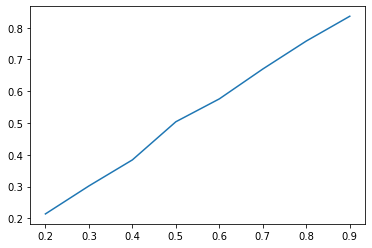

In [12]:
arr4 = quality(task4, theta, 4)

plt.plot(theta, arr4)
plt.show

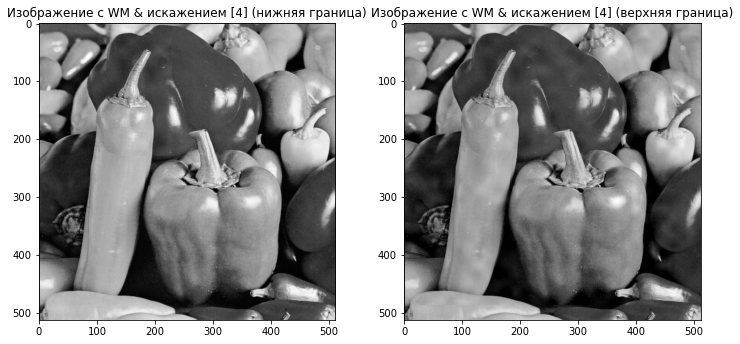

In [13]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Изображение с WM & искажением [4] (нижняя граница)')
plt.imshow(task4[0], 'gray')
plt.subplot(2,2,2)
plt.title('Изображение с WM & искажением [4] (верхняя граница)')
plt.imshow(task4[len(task4)-1], 'gray')

7. Повышение резкости

In [14]:
delta = 2
iter = list(range(3, 16, delta))

task7 = []
cnt = 0

for j in iter:
    task7.append(sharpening(Cw, j))
    cv2.imwrite('Cw_7_{}.pgm'.format(j), task7[cnt])
    cnt += 1

<function matplotlib.pyplot.show(*args, **kw)>

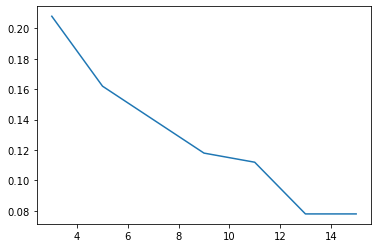

In [15]:
arr7 = quality(task7, iter, 7)

plt.plot(iter, arr7)
plt.show

In [16]:
task7[1]

array([[147, 113,  71, ..., 153, 196, 148],
       [144,  40, 202, ...,  98,  44,  49],
       [135,  39, 189, ...,   8, 246, 233],
       ...,
       [ 75,  57,  15, ..., 230, 228, 124],
       [ 80,  38, 146, ..., 205, 215, 254],
       [ 90, 100, 242, ..., 138, 232, 230]], dtype=uint8)

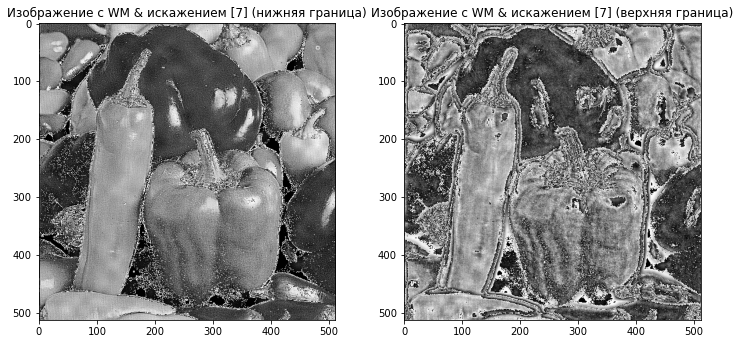

In [17]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Изображение с WM & искажением [7] (нижняя граница)')
plt.imshow((task7[0]), 'gray')
plt.subplot(2,2,2)
plt.title('Изображение с WM & искажением [7] (верхняя граница)')
plt.imshow(task7[len(task7)-1], 'gray')

In [26]:
cv2.imwrite('test8.jpg', task7[6])

True

8. Медианная фильтрация

In [19]:
delta = 2
iter = list(range(3, 16, delta))
task8 = []

cnt = 0
for j in iter:
    task8.append(medianFilt_img(Cw, j))
    cv2.imwrite('Cw_8_{}.pgm'.format(j), task8[cnt])
    cnt += 1

<function matplotlib.pyplot.show(*args, **kw)>

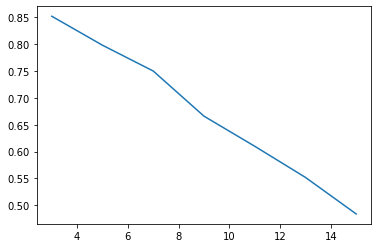

In [20]:
arr8 = quality(task8, iter, 8)

plt.plot(iter, arr8)
plt.show

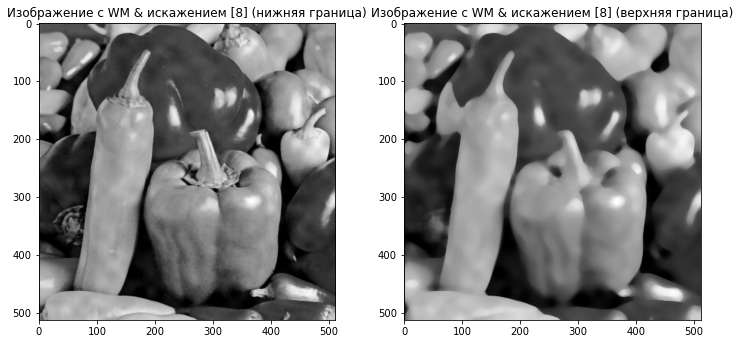

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Изображение с WM & искажением [8] (нижняя граница)')
plt.imshow(task8[0], 'gray')
plt.subplot(2,2,2)
plt.title('Изображение с WM & искажением [8] (верхняя граница)')
plt.imshow(task8[len(task8)-1], 'gray')

9. JPEG-сжатие с потерями

In [22]:
iter = list(range(30,91,10))
task9 = []

for j in iter:
    im = jpeg_img(Cw, j)
    task9.append(im)
    cv2.imwrite('Cw_9_{}.pgm'.format(j), im)

<function matplotlib.pyplot.show(*args, **kw)>

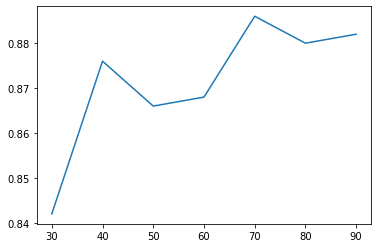

In [23]:
arr9 = quality(task9, iter, 9)

plt.plot(iter, arr9)
plt.show

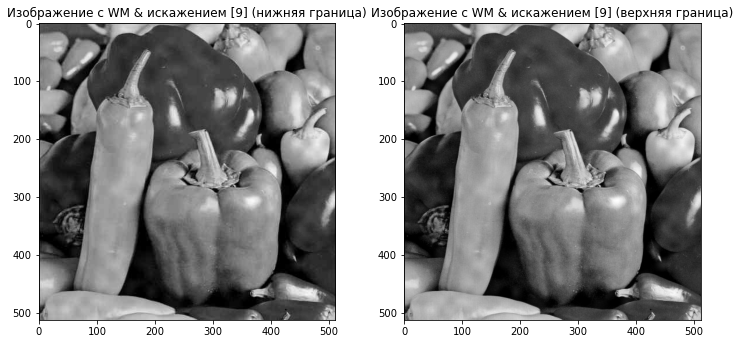

In [24]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Изображение с WM & искажением [9] (нижняя граница)')
plt.imshow(task9[0],'gray')
plt.subplot(2,2,2)
plt.title('Изображение с WM & искажением [9] (верхняя граница)')
plt.imshow(task9[len(task9)-1],'gray')